### Importing libraries

In [1]:
import torch
import torch.utils.data as data_utils

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

/Users/loonycorn/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Loading dataset

#### Diamonds dataset
Source: https://www.kaggle.com/shivam2503/diamonds   
Datafields:

* carat weight of the diamond (0.2--5.01)

* cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

* color diamond colour, from J (worst) to D (best)

* clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

* depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

* table width of top of diamond relative to widest point

* price price in US dollars

* x length in mm (0--10.74)

* y width in mm (0--58.9)

* z depth in mm (0--31.8)

In [2]:
diamonds_data = pd.read_csv('datasets/diamonds.csv', index_col=0)

diamonds_data.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [3]:
diamonds_data.shape

(53940, 10)

In [4]:
diamonds_data = diamonds_data.sample(5000, replace=False)

In [5]:
diamonds_data['cut'].value_counts()

Ideal        1978
Premium      1279
Very Good    1112
Good          483
Fair          148
Name: cut, dtype: int64

In [6]:
diamonds_data['color'].value_counts()

G    1030
E     977
F     874
H     747
D     611
I     521
J     240
Name: color, dtype: int64

In [7]:
diamonds_data['clarity'].value_counts()

VS2     1193
SI1     1185
SI2      839
VS1      740
VVS2     445
VVS1     351
IF       168
I1        79
Name: clarity, dtype: int64

In [8]:
diamonds_data.describe()

,carat,depth,table,price,x,y,z
count,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,0.803538,61.788320,57.474800,3995.10260,5.742690,5.744566,3.546074
std,0.478023,1.420722,2.231787,4066.97442,1.123872,1.114735,0.699272
min,0.200000,50.800000,49.000000,352.00000,3.760000,3.730000,0.000000
25%,0.400000,61.100000,56.000000,957.50000,4.720000,4.730000,2.920000
50%,0.700000,61.900000,57.000000,2417.50000,5.700000,5.710000,3.530000
75%,1.050000,62.600000,59.000000,5430.00000,6.550000,6.540000,4.040000
max,4.130000,71.300000,76.000000,18795.00000,10.010000,9.940000,6.430000


### Visualizing Relationships

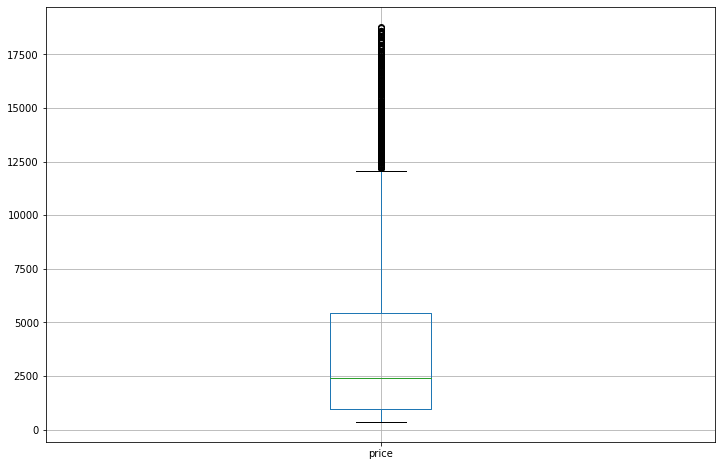

In [9]:
plt.figure(figsize=(12, 8))

diamonds_data.boxplot('price')

plt.show()

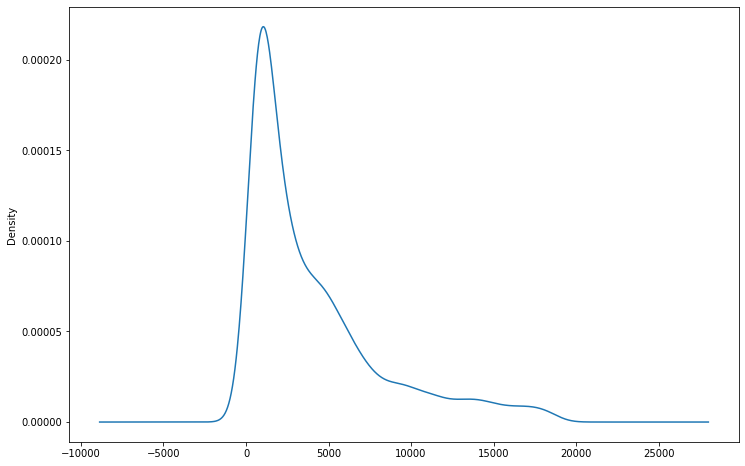

In [10]:
plt.figure(figsize=(12, 8))

diamonds_data['price'].plot.kde()

plt.show()

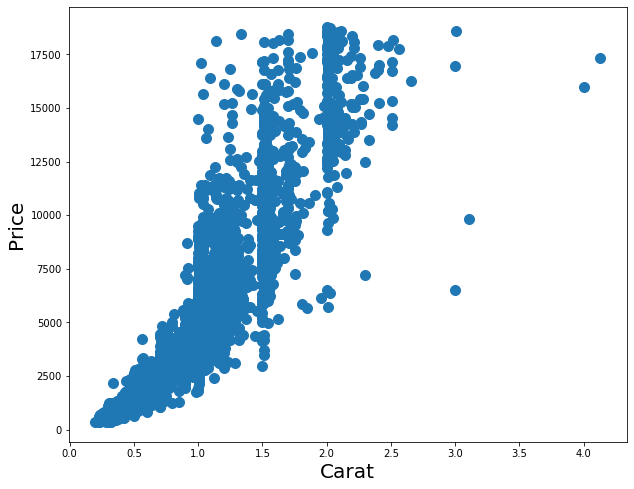

In [11]:
plt.figure(figsize=(10, 8))

plt.scatter(diamonds_data['carat'], diamonds_data['price'], s=100)

plt.xlabel('Carat', fontsize=20)
plt.ylabel('Price', fontsize=20)

plt.show()

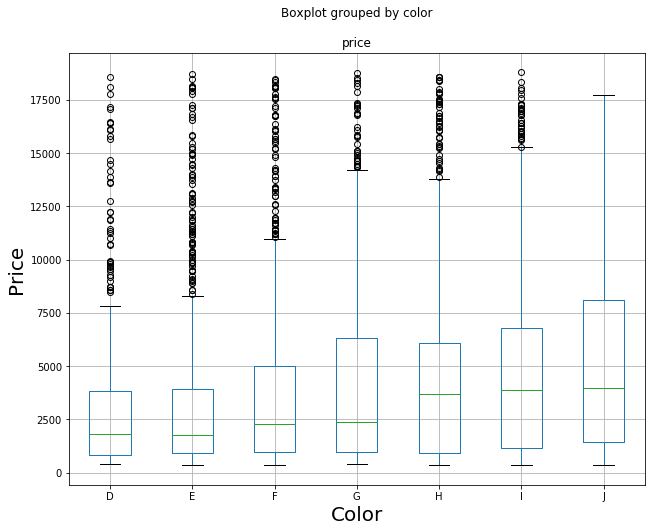

In [12]:
diamonds_data.boxplot('price', 'color', figsize=(10, 8))

plt.xlabel('Color', fontsize=20)
plt.ylabel('Price', fontsize=20)

plt.show()

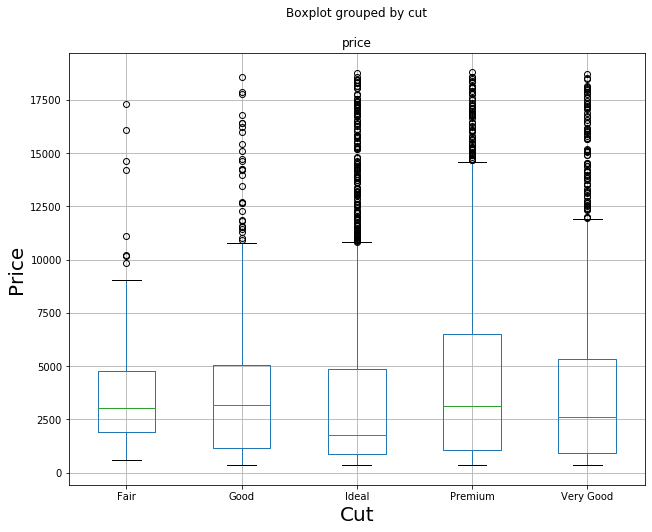

In [13]:
diamonds_data.boxplot('price', 'cut', figsize=(10, 8))

plt.xlabel('Cut', fontsize=20)
plt.ylabel('Price', fontsize=20)

plt.show()

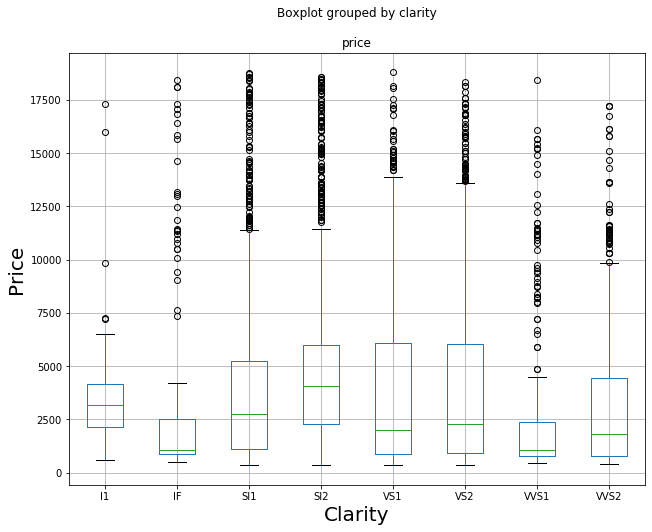

In [14]:
diamonds_data.boxplot('price', 'clarity', figsize=(10, 8))

plt.xlabel('Clarity', fontsize=20)
plt.ylabel('Price', fontsize=20)

plt.show()

In [15]:
diamonds_data_corr = diamonds_data.corr()

diamonds_data_corr

,carat,depth,table,price,x,y,z
carat,1.000000,0.025693,0.172883,0.917935,0.977465,0.976506,0.967638
depth,0.025693,1.000000,-0.272056,-0.023919,-0.028798,-0.031777,0.098773
table,0.172883,-0.272056,1.000000,0.120700,0.191000,0.184370,0.149717
price,0.917935,-0.023919,0.120700,1.000000,0.885361,0.887571,0.873781
x,0.977465,-0.028798,0.191000,0.885361,1.000000,0.998887,0.981652
y,0.976506,-0.031777,0.184370,0.887571,0.998887,1.000000,0.981458
z,0.967638,0.098773,0.149717,0.873781,0.981652,0.981458,1.000000


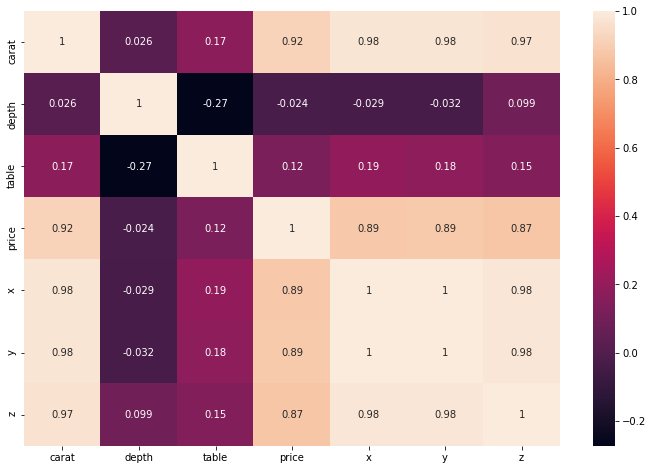

In [16]:
plt.subplots(figsize=(12, 8))

sns.heatmap(diamonds_data_corr, annot=True)

plt.show()

In [17]:
features = diamonds_data.drop('price', axis=1)

target = diamonds_data[['price']]

In [18]:
features.head()

,carat,cut,color,clarity,depth,table,x,y,z
3836,1.00,Premium,H,SI2,59.0,58.0,6.62,6.50,3.87
3992,1.06,Very Good,I,SI2,58.4,62.0,6.65,6.70,3.90
42233,0.53,Very Good,F,SI1,60.9,56.0,5.21,5.23,3.18
45561,0.53,Good,F,VS1,64.2,56.0,5.11,5.14,3.29
36423,0.39,Good,G,VS2,63.7,53.0,4.67,4.62,2.96


In [19]:
categorical_features = features[['color', 'cut', 'clarity']].copy()

categorical_features.head()

,color,cut,clarity
3836,H,Premium,SI2
3992,I,Very Good,SI2
42233,F,Very Good,SI1
45561,F,Good,VS1
36423,G,Good,VS2


In [20]:
numeric_features = features.drop(['color', 'cut', 'clarity'], axis=1)

numeric_features.head()

,carat,depth,table,x,y,z
3836,1.00,59.0,58.0,6.62,6.50,3.87
3992,1.06,58.4,62.0,6.65,6.70,3.90
42233,0.53,60.9,56.0,5.21,5.23,3.18
45561,0.53,64.2,56.0,5.11,5.14,3.29
36423,0.39,63.7,53.0,4.67,4.62,2.96


### Performing label and one hot encoding for categorical columns

In [21]:
categorical_features['color'].unique()

array(['H', 'I', 'F', 'G', 'E', 'D', 'J'], dtype=object)

In [22]:
categorical_features['cut'].unique()

array(['Premium', 'Very Good', 'Good', 'Ideal', 'Fair'], dtype=object)

In [23]:
categorical_features['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'I1', 'VVS2', 'VVS1', 'IF'],
      dtype=object)

In [24]:
color_dict = {'D':0, 'E':1, 'F':2, 'G':3, 'H':4, 'I':5, 'J':6}

categorical_features['color'].replace(color_dict, inplace=True)

categorical_features.head()

,color,cut,clarity
3836,4,Premium,SI2
3992,5,Very Good,SI2
42233,2,Very Good,SI1
45561,2,Good,VS1
36423,3,Good,VS2


In [25]:
cut_dict = {'Fair':0, 'Good':1, 'Very Good':2, 'Premium':3, 'Ideal':4}

categorical_features['cut'].replace(cut_dict, inplace=True)

categorical_features.head()

,color,cut,clarity
3836,4,3,SI2
3992,5,2,SI2
42233,2,2,SI1
45561,2,1,VS1
36423,3,1,VS2


In [26]:
clarity_dict = {'I1':0, 'SI2':1, 'SI1':2, 'VS2':3, 'VS1':4, 'VVS2':5, 'VVS1':6, 'IF':7}

categorical_features['clarity'].replace(clarity_dict, inplace=True)

categorical_features.head()

,color,cut,clarity
3836,4,3,1
3992,5,2,1
42233,2,2,2
45561,2,1,4
36423,3,1,3


In [27]:
numeric_features.describe()

,carat,depth,table,x,y,z
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.803538,61.788320,57.474800,5.742690,5.744566,3.546074
std,0.478023,1.420722,2.231787,1.123872,1.114735,0.699272
min,0.200000,50.800000,49.000000,3.760000,3.730000,0.000000
25%,0.400000,61.100000,56.000000,4.720000,4.730000,2.920000
50%,0.700000,61.900000,57.000000,5.700000,5.710000,3.530000
75%,1.050000,62.600000,59.000000,6.550000,6.540000,4.040000
max,4.130000,71.300000,76.000000,10.010000,9.940000,6.430000


In [28]:
standardScaler = StandardScaler()

numeric_features = pd.DataFrame(standardScaler.fit_transform(numeric_features), 
                                columns=numeric_features.columns,
                                index=numeric_features.index)

numeric_features.describe()

,carat,depth,table,x,y,z
count,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03
mean,1.891820e-17,8.105794e-16,-1.062195e-15,-4.766187e-16,-6.604273e-16,-5.689005e-16
std,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00
min,-1.262698e+00,-7.735094e+00,-3.797696e+00,-1.764337e+00,-1.807396e+00,-5.071599e+00
25%,-8.442658e-01,-4.845345e-01,-6.608818e-01,-9.100614e-01,-9.102318e-01,-8.954118e-01
50%,-2.166180e-01,7.861578e-02,-2.127656e-01,-3.798856e-02,-3.101136e-02,-2.298905e-02
75%,5.156378e-01,5.713723e-01,6.834669e-01,7.184011e-01,7.136346e-01,7.064136e-01
max,6.959488e+00,6.695631e+00,8.301443e+00,3.797352e+00,3.763991e+00,4.124594e+00


In [29]:
numeric_features.head()

,carat,depth,table,x,y,z
3836,0.411030,-1.962804,0.235351,0.780692,0.677748,0.463279
3992,0.536559,-2.385167,2.027816,0.807388,0.857181,0.506185
42233,-0.572285,-0.625322,-0.660882,-0.474025,-0.461650,-0.523559
45561,-0.572285,1.697673,-0.660882,-0.563012,-0.542395,-0.366237
36423,-0.865187,1.345704,-2.005231,-0.954555,-1.008920,-0.838204


In [30]:
categorical_features.head()

,color,cut,clarity
3836,4,3,1
3992,5,2,1
42233,2,2,2
45561,2,1,4
36423,3,1,3


In [31]:
processed_features = pd.concat([numeric_features, categorical_features], axis=1,
                               ignore_index=True, sort=False)

processed_features.head()

,0,1,2,3,4,5,6,7,8
3836,0.411030,-1.962804,0.235351,0.780692,0.677748,0.463279,4,3,1
3992,0.536559,-2.385167,2.027816,0.807388,0.857181,0.506185,5,2,1
42233,-0.572285,-0.625322,-0.660882,-0.474025,-0.461650,-0.523559,2,2,2
45561,-0.572285,1.697673,-0.660882,-0.563012,-0.542395,-0.366237,2,1,4
36423,-0.865187,1.345704,-2.005231,-0.954555,-1.008920,-0.838204,3,1,3


In [32]:
processed_features.shape

(5000, 9)

In [33]:
target.head(10)

,price
3836,3472
3992,3515
42233,1291
45561,1688
36423,942
8418,4404
3551,3415
25151,13720
35069,886
53386,2662


In [34]:
x_train, x_test, y_train, y_test = train_test_split(processed_features, 
                                                    target,
                                                    test_size=0.2, random_state=1)

In [35]:
x_train_tensor = torch.tensor(x_train.values, dtype = torch.float)
x_test_tensor = torch.tensor(x_test.values, dtype = torch.float)

y_train_tensor = torch.tensor(y_train.values, dtype = torch.float)
y_test_tensor = torch.tensor(y_test.values, dtype = torch.float)

In [36]:
x_train_tensor.shape, y_train_tensor.shape

(torch.Size([4000, 9]), torch.Size([4000, 1]))

In [37]:
x_test_tensor.shape, y_test_tensor.shape

(torch.Size([1000, 9]), torch.Size([1000, 1]))

In [38]:
x_train_tensor[:5]

tensor([[-0.6141, -0.0622, -0.6609, -0.5541, -0.5334, -0.5379,  2.0000,  4.0000,
          2.0000],
        [ 0.4320, -2.5963,  0.6835,  0.8163,  0.7675, -5.0716,  4.0000,  3.0000,
          0.0000],
        [-0.5095, -0.0622, -0.6609, -0.3761, -0.4168, -0.3948,  2.0000,  4.0000,
          4.0000],
        [-0.4886, -2.9483,  1.1316, -0.2249, -0.2643, -0.5665,  2.0000,  1.0000,
          5.0000],
        [-0.4258, -0.6253, -1.1090, -0.2249, -0.2104, -0.2947,  2.0000,  4.0000,
          3.0000]])

In [39]:
y_train_tensor[:5]

tensor([[1394.],
        [3167.],
        [2016.],
        [2298.],
        [2099.]])

In [40]:
train_data = data_utils.TensorDataset(x_train_tensor, y_train_tensor)

train_loader = data_utils.DataLoader(train_data, batch_size=500, shuffle=True)

In [41]:
len(train_loader)

8

In [42]:
features_batch, target_batch = iter(train_loader).next()

features_batch.shape

torch.Size([500, 9])

In [43]:
target_batch.shape

torch.Size([500, 1])

#### By default reduction method in loss function is 'mean'

In [44]:
input_layer = x_train_tensor.shape[1]

output_layer = 1

hidden_layer = 12

loss_fn = torch.nn.MSELoss()

## Below we are building two model 
#### First we will take the first model and run the code till end then we will take the second model and run the code till end

In [ ]:
# TODO recording (Step1): Model and learning rate (this should be only an ok model)

model = torch.nn.Sequential(torch.nn.Linear(input_layer, hidden_layer),
                            torch.nn.Linear(hidden_layer, output_layer))

optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

In [ ]:
# TODO recording (Step2): Model and learning rate (this should also be just an ok model)

model = torch.nn.Sequential(torch.nn.Linear(input_layer, hidden_layer),
                            torch.nn.ReLU(),
                            torch.nn.Linear(hidden_layer, output_layer))

optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

In [ ]:
# TODO recording (Step3): Model and learning rate (only the learning rate has changed)
# Model converges quickly
# Because of that we'll get a very high R2, probably overfitting

model = torch.nn.Sequential(torch.nn.Linear(input_layer, hidden_layer),
                            torch.nn.ReLU(),
                            torch.nn.Linear(hidden_layer, output_layer))

optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [45]:
# TODO recording (Step4): Model woth dropout and learning rate 
# The R2 should fall a little from earlier

model = torch.nn.Sequential(torch.nn.Linear(input_layer, hidden_layer),
                            torch.nn.ReLU(),
                            torch.nn.Dropout(0.4),
                            torch.nn.Linear(hidden_layer, output_layer))

optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [46]:
total_step = len(train_loader)

num_epochs = 1000

for epoch in range(num_epochs + 1):
    for i, (features, target) in enumerate(train_loader):
        output = model(features)
        loss = loss_fn(output, target)
        
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
        
        if epoch % 20 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                  .format(epoch+1, num_epochs, i+1, total_step, loss.item()), flush=True)

Epoch [1/1000], Step [1/8], Loss: 31593184.0000
Epoch [1/1000], Step [2/8], Loss: 29646156.0000
Epoch [1/1000], Step [3/8], Loss: 33223680.0000
Epoch [1/1000], Step [4/8], Loss: 37765876.0000
Epoch [1/1000], Step [5/8], Loss: 27909044.0000
Epoch [1/1000], Step [6/8], Loss: 30090096.0000
Epoch [1/1000], Step [7/8], Loss: 34455840.0000
Epoch [1/1000], Step [8/8], Loss: 31267908.0000
Epoch [21/1000], Step [1/8], Loss: 26370776.0000
Epoch [21/1000], Step [2/8], Loss: 32643120.0000
Epoch [21/1000], Step [3/8], Loss: 24665958.0000
Epoch [21/1000], Step [4/8], Loss: 25779564.0000
Epoch [21/1000], Step [5/8], Loss: 27513548.0000
Epoch [21/1000], Step [6/8], Loss: 29178674.0000
Epoch [21/1000], Step [7/8], Loss: 22644178.0000
Epoch [21/1000], Step [8/8], Loss: 23650214.0000
Epoch [41/1000], Step [1/8], Loss: 16490278.0000
Epoch [41/1000], Step [2/8], Loss: 14447814.0000
Epoch [41/1000], Step [3/8], Loss: 13852801.0000
Epoch [41/1000], Step [4/8], Loss: 15108703.0000
Epoch [41/1000], Step [5/8],

Epoch [421/1000], Step [1/8], Loss: 2672807.0000
Epoch [421/1000], Step [2/8], Loss: 2667900.0000
Epoch [421/1000], Step [3/8], Loss: 2885926.2500
Epoch [421/1000], Step [4/8], Loss: 3140932.2500
Epoch [421/1000], Step [5/8], Loss: 1979955.3750
Epoch [421/1000], Step [6/8], Loss: 2839524.0000
Epoch [421/1000], Step [7/8], Loss: 2266067.5000
Epoch [421/1000], Step [8/8], Loss: 3753441.0000
Epoch [441/1000], Step [1/8], Loss: 3246377.5000
Epoch [441/1000], Step [2/8], Loss: 2579355.0000
Epoch [441/1000], Step [3/8], Loss: 2395441.2500
Epoch [441/1000], Step [4/8], Loss: 2126311.5000
Epoch [441/1000], Step [5/8], Loss: 2400702.5000
Epoch [441/1000], Step [6/8], Loss: 2934996.5000
Epoch [441/1000], Step [7/8], Loss: 2558537.0000
Epoch [441/1000], Step [8/8], Loss: 2467459.0000
Epoch [461/1000], Step [1/8], Loss: 2665732.2500
Epoch [461/1000], Step [2/8], Loss: 2621342.5000
Epoch [461/1000], Step [3/8], Loss: 3034745.0000
Epoch [461/1000], Step [4/8], Loss: 2481983.5000
Epoch [461/1000], St

Epoch [841/1000], Step [1/8], Loss: 2664317.0000
Epoch [841/1000], Step [2/8], Loss: 2618974.2500
Epoch [841/1000], Step [3/8], Loss: 2875899.2500
Epoch [841/1000], Step [4/8], Loss: 2477230.7500
Epoch [841/1000], Step [5/8], Loss: 2481770.5000
Epoch [841/1000], Step [6/8], Loss: 2111565.0000
Epoch [841/1000], Step [7/8], Loss: 2904464.7500
Epoch [841/1000], Step [8/8], Loss: 2370710.0000
Epoch [861/1000], Step [1/8], Loss: 3294765.5000
Epoch [861/1000], Step [2/8], Loss: 1489404.3750
Epoch [861/1000], Step [3/8], Loss: 2428727.0000
Epoch [861/1000], Step [4/8], Loss: 2214779.2500
Epoch [861/1000], Step [5/8], Loss: 2581779.7500
Epoch [861/1000], Step [6/8], Loss: 2349783.2500
Epoch [861/1000], Step [7/8], Loss: 2395730.2500
Epoch [861/1000], Step [8/8], Loss: 3674638.7500
Epoch [881/1000], Step [1/8], Loss: 2251622.2500
Epoch [881/1000], Step [2/8], Loss: 2861092.5000
Epoch [881/1000], Step [3/8], Loss: 2886216.7500
Epoch [881/1000], Step [4/8], Loss: 2201825.0000
Epoch [881/1000], St

In [47]:
model.eval()

with torch.no_grad():
    y_pred = model(x_test_tensor)

In [48]:
sample = x_test.iloc[10]

sample_tensor = torch.tensor(sample.values,
                             dtype = torch.float)

with torch.no_grad():
    y_pred = model(sample_tensor)
    
print("Predicted price: ", (y_pred.item()))
print("Actual price: ", (y_test.iloc[10]))

Predicted price:  3406.253662109375
Actual price:  price    4124
Name: 6846, dtype: int64


In [49]:
sample = x_test.iloc[20]

sample_tensor = torch.tensor(sample.values,
                             dtype = torch.float)

with torch.no_grad():
    y_pred = model(sample_tensor)
    
print("Predicted price: ", (y_pred.item()))
print("Actual price: ", (y_test.iloc[20]))

Predicted price:  12172.017578125
Actual price:  price    14482
Name: 25613, dtype: int64


In [50]:
with torch.no_grad():
    y_pred_tensor = model(x_test_tensor)

In [51]:
y_pred = y_pred_tensor.detach().numpy()

y_pred.shape

(1000, 1)

In [52]:
y_test.values.shape

(1000, 1)

In [53]:
compare_df = pd.DataFrame({'Actual price': np.squeeze(y_test.values), 
                           'Predicted price': np.squeeze(y_pred)})

compare_df.sample(10)

,Actual price,Predicted price
374,7351,6864.920898
568,900,510.253967
543,597,379.419952
82,16854,15526.008789
347,2338,1385.742798
431,17658,15031.387695
482,3394,2471.397461
448,709,515.012329
202,4797,4387.099121
690,5019,4763.947266


In [54]:
r2_score(y_test, y_pred)

0.9338853210436859

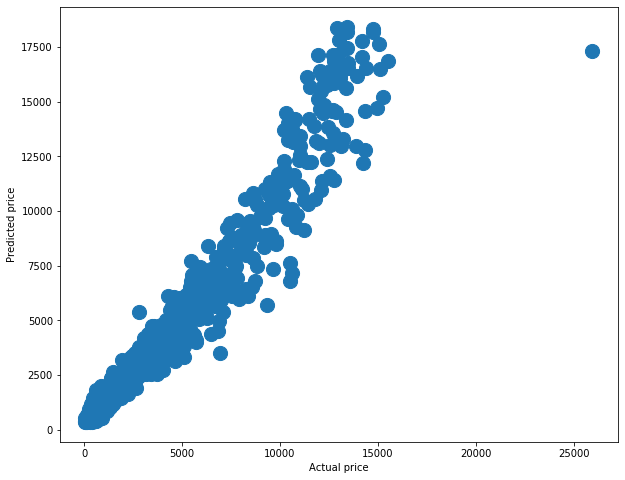

In [55]:
plt.figure(figsize=(10, 8))

plt.scatter(y_pred, y_test.values, s=200)

plt.xlabel('Actual price')
plt.ylabel('Predicted price')

plt.show()